<a href="https://colab.research.google.com/github/KOISSYK/AI_class_machine-learning/blob/main/5_01%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **결정트리**

결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다

>**로지스틱회귀로 와인 분류하기**

In [34]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [35]:
wine.head(10)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
5,9.4,1.8,3.51,0.0
6,9.4,1.6,3.30,0.0
7,10.0,1.2,3.39,0.0
8,9.5,2.0,3.36,0.0
9,10.5,6.1,3.35,0.0


In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [37]:
wine.describe() #최소(min), 최대(max), 평균(mean), 표준편차(std),  1사분위수(25%), 중간값(50%), 3사분위수(75%) 값을 알려준다.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [38]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [39]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()  #train_test_split 으로 데이터셋을 나누기 위해서 
target = wine['class'].to_numpy()  

In [40]:
print(data)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [41]:
print(target)

[0. 0. 0. ... 1. 1. 1.]


train_test_split허용되는 입력은 목록, numpy 배열, scipy-sparse 행렬 또는 pandas 데이터 프레임입니다.

In [42]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)      #학습데이터 분할

In [43]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [44]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #표준화-평균을 제거하고 단위 분산에 맞게 조정하여 기능을 표준화합니다.
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


>**결정트리(Decision Tree)**

In [46]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8592307692307692


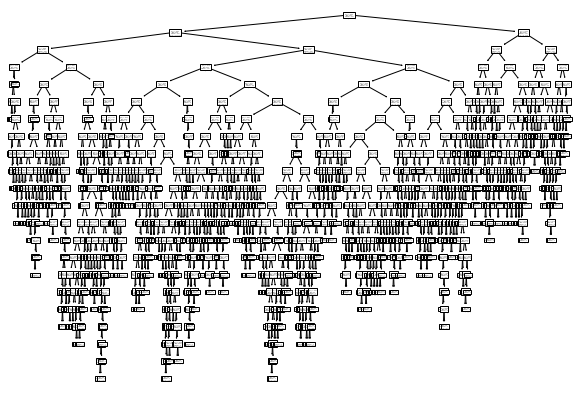

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

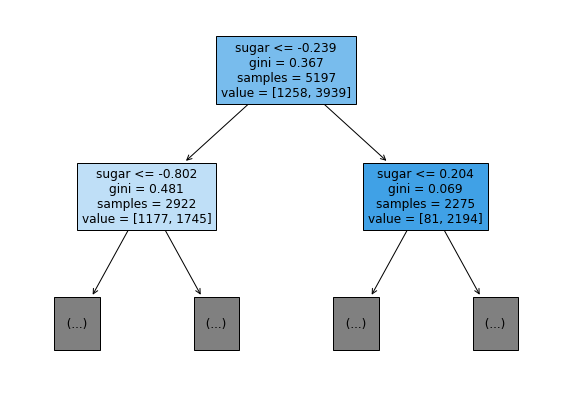

In [49]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

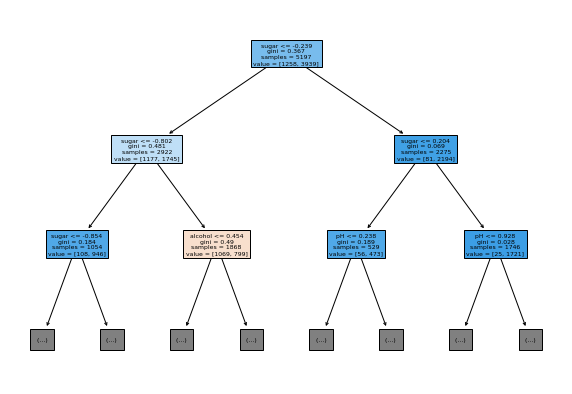

In [50]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [51]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


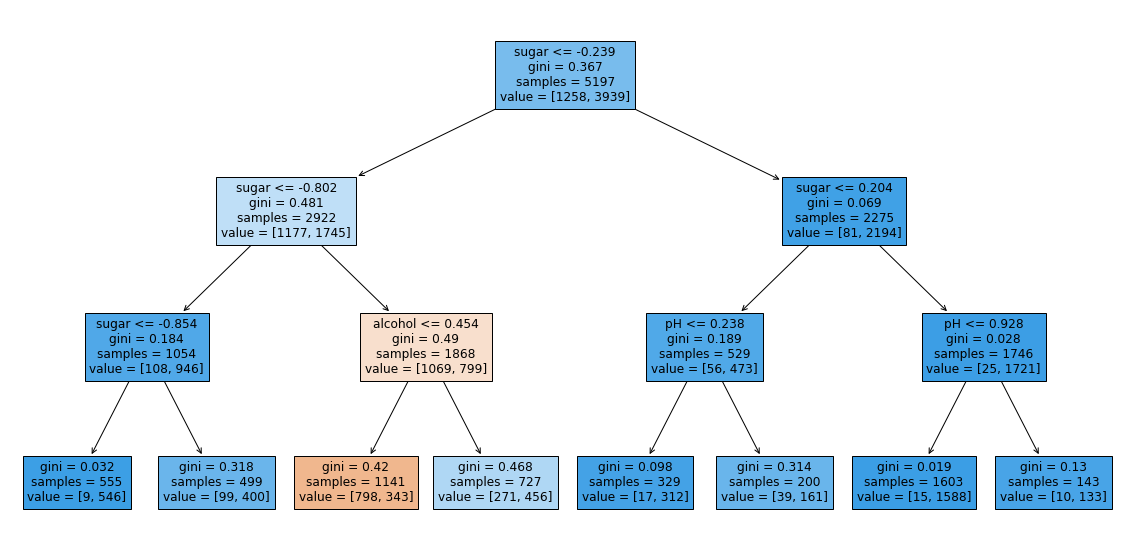

In [52]:
plt.figure(figsize=(20,10))
plot_tree(dt,filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [53]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


>확인문제

In [54]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input,train_target)

print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8874350586877044
0.8615384615384616


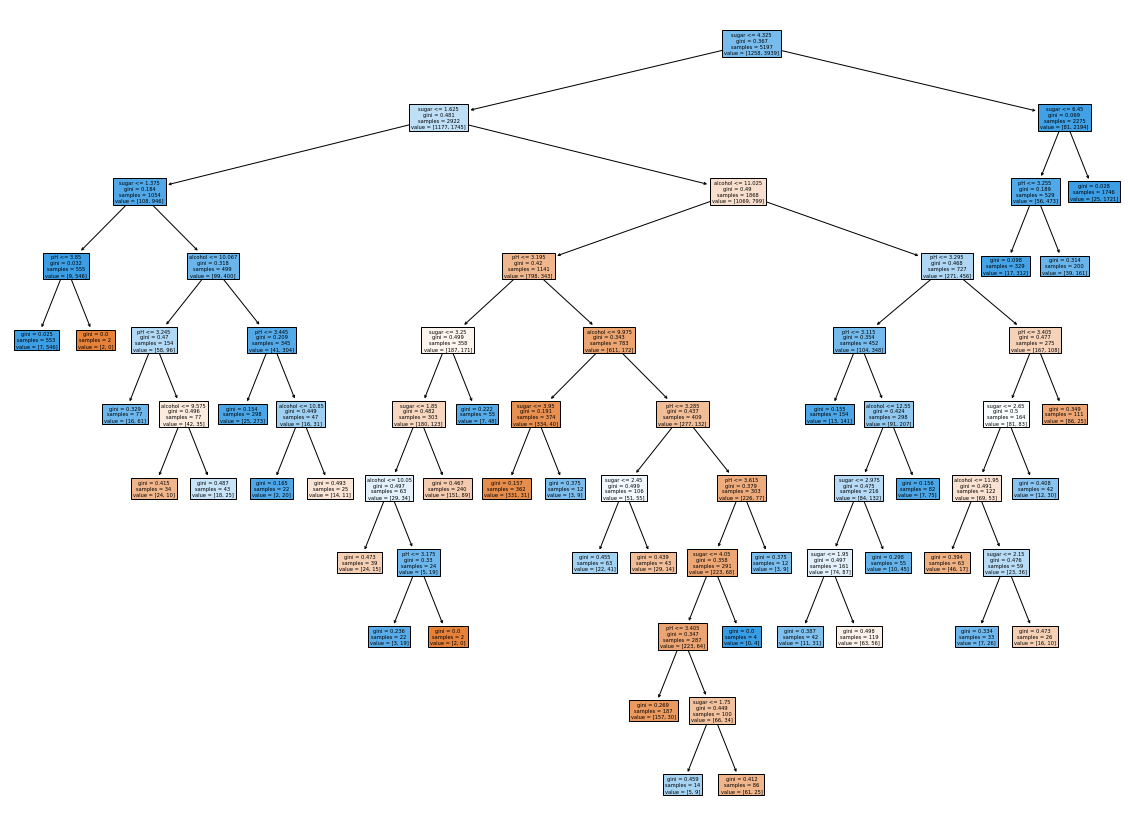

In [55]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()